<a href="https://colab.research.google.com/github/harshitha2403/Hate-Speech-Detection/blob/main/HSB_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.feature_extraction.text import CountVectorizer
import re
from tqdm import tqdm
from gensim.models.doc2vec import TaggedDocument
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HARSHITHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data = pd.read_csv('C:/Users/HARSHITHA/Desktop/HSBalanced/HateSpeechDatasetBalanced.csv')
data.shape

(726119, 2)

In [ ]:
duplicates = data.duplicated()
print(duplicates.any())

True


In [ ]:
# Drop duplicates and keep the first occurrence
data = data.drop_duplicates()
data.shape

(701073, 2)

In [ ]:
print(data.columns.tolist())

['text', 'label']


In [ ]:
data.isnull().any()

,0
text,False
label,False


In [ ]:
data[data['label'] == 1].count()

,0
text,359097
label,359097


In [ ]:
data[data['label'] == 0].count()

,0
text,341976
label,341976


<Axes: xlabel='label'>

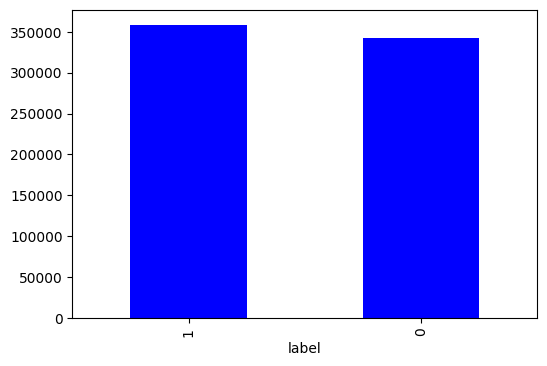

In [ ]:
data['label'].value_counts().plot.bar(color = 'blue', figsize = (6, 4))

Text(0.5, 1.0, 'Frequently used words')

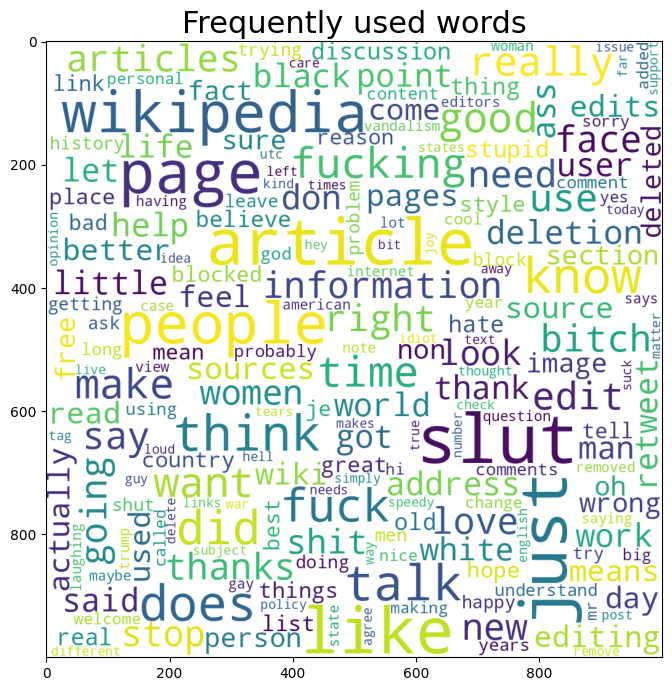

In [ ]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

from wordcloud import WordCloud

words = WordCloud(background_color = 'white', width = 1000, height = 1000, random_state = 0, max_font_size = 110).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(words)
plt.title("Frequently used words", fontsize = 22)


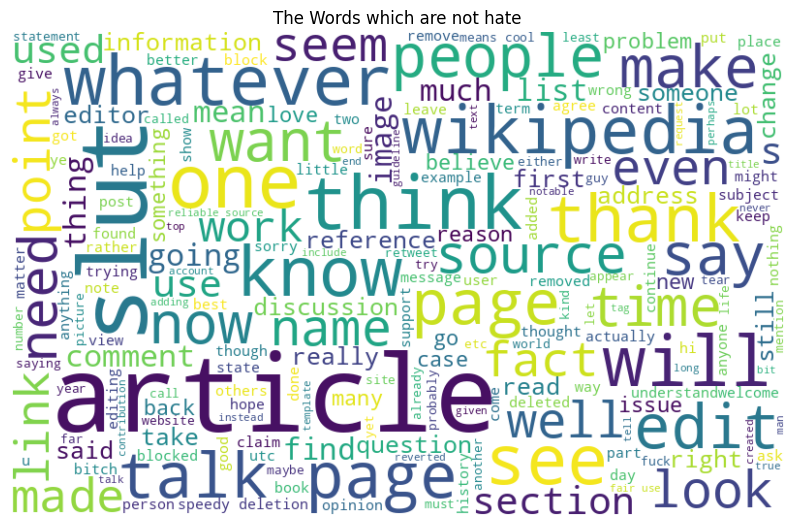

In [ ]:
normal_words =' '.join([text for text in data['text'][data['label'] == 0]])

words = WordCloud(background_color = 'white', width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(words, interpolation="bilinear")
plt.axis('off')
plt.title('The Words which are not hate')
plt.show()

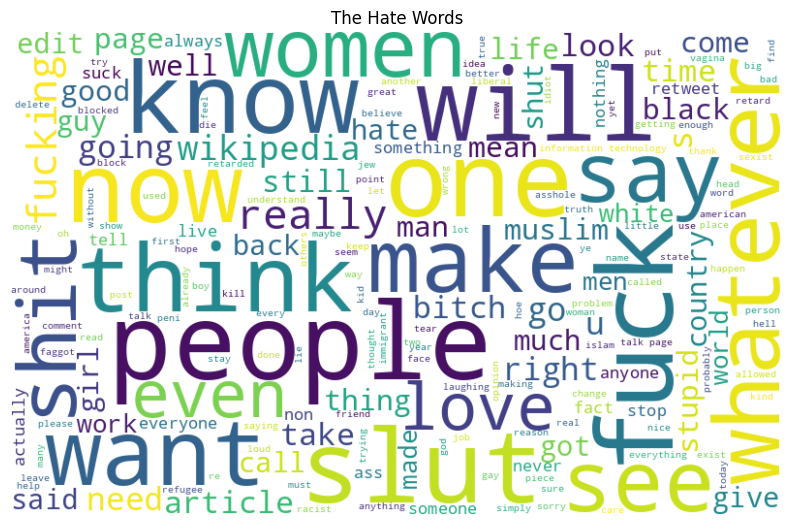

In [ ]:
hate_words =' '.join([text for text in data['text'][data['label'] == 1]])

words = WordCloud(background_color = 'white', width=800, height=500, random_state = 0, max_font_size = 110).generate(hate_words)
plt.figure(figsize=(10, 7))
plt.imshow(words, interpolation="bilinear")
plt.axis('off')
plt.title('The Hate Words')
plt.show()

In [ ]:
train = pd.read_csv('C:/Users/HARSHITHA/Desktop/Final_code/HateSpeech/trainHSB.csv')
test = pd.read_csv('C:/Users/HARSHITHA/Desktop/Final_code/HateSpeech/testHSB.csv')
print(train.shape)
print(test.shape)

(37500, 2)
(12500, 2)


In [ ]:
train_corpus = []

for i in range(0, 37500):
  review = re.sub('[^a-zA-Z]', ' ', train['text'][i])
  review = review.lower()
  review = review.split()

  ps = PorterStemmer()

  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [ ]:
test_corpus = []

for i in range(0, 12500):
  review = re.sub('[^a-zA-Z]', ' ', test['text'][i])
  review = review.lower()
  review = review.split()

  ps = PorterStemmer()

  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

In [ ]:
#Tokenizer
cv = CountVectorizer(max_features = 2500)
x_train = cv.fit_transform(train_corpus).toarray()
y_train = train.iloc[:, 1]

x_test = cv.fit_transform(test_corpus).toarray()
y_test = test.iloc[:, 1]

print(x_train.shape)
print(y_train.shape)

(50000, 2500)
(50000,)


In [ ]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
model1 = RandomForestClassifier()
model1.fit(x_train, y_train)

pred1 = model1.predict(x_test)


print(classification_report(y_test, pred1))

# confusion matrix
cm1 = confusion_matrix(y_test, pred1)
print(cm1)

              precision    recall  f1-score   support

           0       0.77      0.78      0.78      6244
           1       0.78      0.77      0.77      6256

    accuracy                           0.78     12500
   macro avg       0.78      0.78      0.78     12500
weighted avg       0.78      0.78      0.78     12500

[[4871 1373]
 [1435 4821]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.77      0.77      0.77      6244
           1       0.77      0.76      0.77      6256

    accuracy                           0.77     12500
   macro avg       0.77      0.77      0.77     12500
weighted avg       0.77      0.77      0.77     12500

[[4805 1439]
 [1472 4784]]


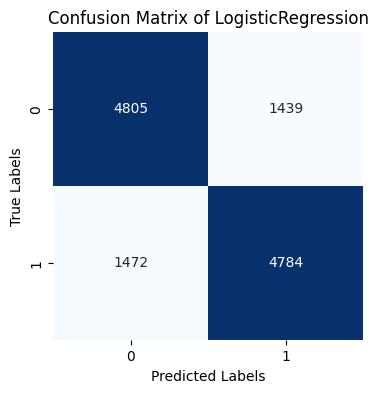

In [ ]:
model2 = LogisticRegression()
model2.fit(x_train, y_train)

pred2 = model2.predict(x_test)


print(classification_report(y_test, pred2))

# confusion matrix
cm2 = confusion_matrix(y_test, pred2)
print(cm2)
#cm
plt.figure(figsize=(4, 4))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of LogisticRegression')
plt.show()

In [ ]:
model3 = DecisionTreeClassifier()
model3.fit(x_train, y_train)

pred3 = model3.predict(x_test)

print(classification_report(y_test, pred3))

# confusion matrix
cm3 = confusion_matrix(y_test, pred3)
print(cm3)

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      6244
           1       0.72      0.70      0.71      6256

    accuracy                           0.72     12500
   macro avg       0.72      0.72      0.72     12500
weighted avg       0.72      0.72      0.72     12500

[[4575 1669]
 [1883 4373]]


              precision    recall  f1-score   support

           0       0.76      0.80      0.78      6244
           1       0.79      0.74      0.76      6256

    accuracy                           0.77     12500
   macro avg       0.77      0.77      0.77     12500
weighted avg       0.77      0.77      0.77     12500

[[5000 1244]
 [1622 4634]]


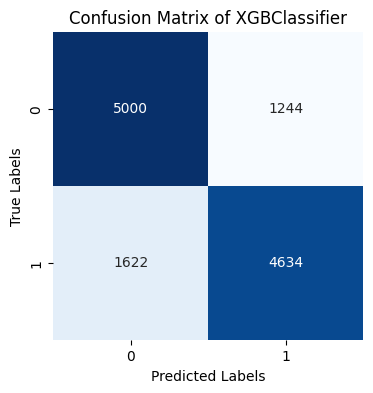

In [ ]:
model4 = XGBClassifier()
model4.fit(x_train, y_train)

# Prediction
pred4 = model4.predict(x_test)


print(classification_report(y_test, pred4))

# confusion matrix
cm4 = confusion_matrix(y_test, pred4)
print(cm4)
plt.figure(figsize=(4, 4))
sns.heatmap(cm4, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of XGBClassifier')
plt.show()

In [ ]:
svm = SVC()
svm.fit(x_train, y_train)

svm_pred = svm.predict(x_test)


print(classification_report(y_test, svm_pred))

# confusion matrix
cmsvm = confusion_matrix(y_test, svm_pred)
print(cmsvm)

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      6244
           1       0.79      0.76      0.77      6256

    accuracy                           0.78     12500
   macro avg       0.78      0.78      0.78     12500
weighted avg       0.78      0.78      0.78     12500

[[4980 1264]
 [1532 4724]]


In [ ]:
print('Accuracy score of RF = {:.4f}'.format(model1.score(x_test, y_test)))
print('Accuracy score of LR= {:.4f}'.format(model2.score(x_test, y_test)))
print('Accuracy score of DT = {:.4f}'.format(model3.score(x_test, y_test)))
print('Accuracy score of XGB= {:.4f}'.format(model4.score(x_test, y_test)))
print('Accuracy score of SVM= {:.4f}'.format(svm.score(x_test, y_test)))

Accuracy score of RF = 0.7754
Accuracy score of LR= 0.7722
Accuracy score of DT = 0.7158
Accuracy score of XGB= 0.7758
Accuracy score of SVM= 0.7763
